<a href="https://colab.research.google.com/github/SidharthSerjy/CNN-CIFAR10-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#libraries

import json
import pandas as pd
import io
import re
from nltk.tokenize import word_tokenize
import nltk


import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import spacy

import spacy


import matplotlib.pyplot as plt
from collections import Counter

from nltk import ngrams

In [19]:
import json

from google.colab import files

uploaded = files.upload()

KeyboardInterrupt: 

In [37]:
file_name = "random_30000_hotel_reviews.JSON"

# Get file content
file_content = uploaded[file_name]
decoded_content = file_content.decode("utf-8", errors="ignore")

# Parse each line separately
data = []
with io.StringIO(decoded_content) as f:
    for i, line in enumerate(f):
        try:
            data.append(json.loads(line))  # Load each JSON object
        except json.JSONDecodeError as e:
            print(f"Skipping invalid line {i+1}: {e}")

print(f"Total JSON objects loaded: {len(data)}")

Total JSON objects loaded: 30000


In [38]:
import pandas as pd

df = pd.DataFrame(data)
print(df.head())  #

                                             ratings  \
0  {'service': 1.0, 'cleanliness': 2.0, 'overall'...   
1  {'cleanliness': 1.0, 'sleep_quality': 1.0, 'ov...   
2  {'service': 4.0, 'cleanliness': 5.0, 'overall'...   
3  {'service': 3.0, 'cleanliness': 2.0, 'overall'...   
4                                   {'overall': 1.0}   

                                        title  \
0                       “Horrible experience”   
1                                 “Stay Away”   
2                “Great location and service”   
3          “I will never go back here again!”   
4  “Ripped off our VISA card after departure”   

                                                text  \
0  First of all we got there and they didn't have...   
1  Found Racist graffiti in the room. Request to ...   
2  Close to Union Square - hotel is a bit of a ma...   
3  I had a bad vibe about this place from the mom...   
4  After we received our "final" bill and left th...   

                               

In [39]:
df = pd.json_normalize(data)

# Display the DataFrame with expanded ratings
print(df.head())

                                        title  \
0                       “Horrible experience”   
1                                 “Stay Away”   
2                “Great location and service”   
3          “I will never go back here again!”   
4  “Ripped off our VISA card after departure”   

                                                text     date_stayed  \
0  First of all we got there and they didn't have...  September 2012   
1  Found Racist graffiti in the room. Request to ...       June 2011   
2  Close to Union Square - hotel is a bit of a ma...    October 2010   
3  I had a bad vibe about this place from the mom...       June 2012   
4  After we received our "final" bill and left th...    January 2012   

   offering_id  num_helpful_votes                date         id  via_mobile  \
0        80138                  0  September 19, 2012  140716137       False   
1       240151                  1       June 27, 2011  114807323       False   
2        80793                  

In [40]:
print(df.columns)


Index(['title', 'text', 'date_stayed', 'offering_id', 'num_helpful_votes',
       'date', 'id', 'via_mobile', 'ratings.service', 'ratings.cleanliness',
       'ratings.overall', 'ratings.value', 'ratings.location',
       'ratings.sleep_quality', 'ratings.rooms', 'author.username',
       'author.num_reviews', 'author.id', 'author.location',
       'author.num_cities', 'author.num_helpful_votes',
       'author.num_type_reviews', 'ratings.check_in_front_desk',
       'ratings.business_service_(e_g_internet_access)'],
      dtype='object')


In [41]:
# Install NLTK library
!pip install nltk

# Download the 'punkt' tokenizer
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
#splitting the data

train_df = df[:10000]  # First 10,000 rows
dev_df = df[10000:20000]  # Next 10,000 rows
test_df = df[20000:]  # Remaining rows

# Display the shapes of the resulting DataFrames to verify
print(f"Training Set Shape: {train_df.shape}")
print(f"Development Set Shape: {dev_df.shape}")
print(f"Test Set Shape: {test_df.shape}")

Training Set Shape: (10000, 26)
Development Set Shape: (10000, 26)
Test Set Shape: (10000, 26)


In [35]:

print(dev_df.columns)


Index(['title', 'text', 'date_stayed', 'offering_id', 'num_helpful_votes',
       'date', 'id', 'via_mobile', 'ratings.service', 'ratings.cleanliness',
       'ratings.overall', 'ratings.value', 'ratings.location',
       'ratings.sleep_quality', 'ratings.rooms', 'author.username',
       'author.num_reviews', 'author.id', 'author.location',
       'author.num_cities', 'author.num_helpful_votes',
       'author.num_type_reviews', 'ratings.check_in_front_desk',
       'ratings.business_service_(e_g_internet_access)', 'title_tokens',
       'text_tokens'],
      dtype='object')


In [43]:

# Download NLTK stopwords (you only need to run this once)
nltk.download('stopwords')

# Load spaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')

# 1. Lowercasing the "title" and "text"
df['title'] = df['title'].str.lower()
df['text'] = df['text'].str.lower()

# 2. Tokenizing and Removing Punctuation
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in string.punctuation]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in string.punctuation]))

# 3. Remove Alphanumeric Words
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word.isalnum()]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if not word.isalnum()]))

# 4. Remove Stop Words
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# 5. Stemming
stemmer = PorterStemmer()
df['title'] = df['title'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))
df['text'] = df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# 6. Lemmatization
df['title'] = df['title'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))
df['text'] = df['text'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

# Split the data into training, development, and test sets
train_df = df[:10000]  # First 10,000 rows
dev_df = df[10000:20000]  # Next 10,000 rows
test_df = df[20000:]  # Remaining rows

# Display the cleaned data for the first 5 rows of the training set
print(train_df[['title', 'text']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  title                                          text
0   " "  not dirty- business- reputation- ` ` ` ` not
1   " "                                              
2   " "                                            be
3   " "                                           not
4   " "                                       ` ` ` `


In [49]:
dev_df.head(20)

,title,text,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,ratings.service,ratings.cleanliness,...,author.username,author.num_reviews,author.id,author.location,author.num_cities,author.num_helpful_votes,author.num_type_reviews,ratings.check_in_front_desk,ratings.business_service_(e_g_internet_access),title_tokens
10000,""" """,be not,July 2011,84107,0,"May 4, 2012",129367971,False,5.0,5.0,...,metalchicRichmond,13.0,AF5EE85EDBDA6D76318AB42AC8F3A780,Richmond,5.0,NaN,6.0,NaN,NaN,"["", nice, hotel, great, locat, ""]"
10001,""" """,be,February 2011,93464,0,"February 15, 2011",96767715,False,4.0,5.0,...,Noelle20,1.0,9983BEFCFA0B7CD9AE4587D6A961C907,"Washington DC, District of Columbia",NaN,NaN,NaN,NaN,NaN,"["", perfect, locat, room, gener, size, ""]"
10002,""" """,check - in non - smok 100 + not not be,September 2011,109008,3,"September 23, 2011",118469580,False,1.0,4.0,...,amanduhcorazon,17.0,9C3CA4390CAD3EF7F823000AFBC8261A,"Glenwood Springs, Colorado",4.0,25.0,NaN,NaN,NaN,"["", rude, staff, extra, charg, overal, unimpre..."
10003,""" """,not,November 2011,223019,2,"November 14, 2011",120569971,False,4.0,4.0,...,Peter G,8.0,952763440840718D6F3C0633D583D119,"Westport, Ireland",6.0,7.0,4.0,NaN,NaN,"["", great, locat, would, stay, ""]"
10004,""" """,11:15,August 2012,90973,1,"August 16, 2012",137342764,False,3.0,4.0,...,redinked,24.0,3F38077A3FD948C54036D2D446E03E07,"Indianapolis, Indiana",12.0,8.0,14.0,NaN,NaN,"["", disappoint, chicago, ""]"
10005,""" """,24 - 28 not .... not want / ne,May 2012,1888977,1,"May 29, 2012",130880504,False,5.0,5.0,...,bneely81,1.0,A4AE8B6F03B158B8E0CF1E018796D622,"Warm Springs, Georgia, United States",NaN,1.0,NaN,NaN,NaN,"["", great, choic, ""]"
10006,""" """,2004 .,NaN,114581,2,"June 27, 2006",5394904,False,NaN,NaN,...,plord120,1.0,0BD198DE3D0C1E8474A7C6E59B358FE3,"Plymouth, MI",NaN,2.0,NaN,NaN,NaN,"["", love, swissotel, ""]"
10007,""" """,st . ....,February 2006,81461,6,"March 6, 2006",4587157,False,4.0,5.0,...,MadMaxH33,10.0,0CC3913C9193E4B380454D5E0C1C1E20,"Santa Barbara, CA",9.0,67.0,10.0,NaN,NaN,"["", great, hotel, pricey, perfect, ""]"
10008,""" park / sleep / fli """,park / sleep / fli 30.49 4.99 not 1:00 step - ...,September 2011,262831,2,"September 22, 2011",118457175,False,5.0,5.0,...,travelgirl37743,11.0,80657F35FEEF929DF7517663AC47115D,"Cedar Rapids, Iowa",9.0,14.0,3.0,NaN,NaN,"["", great, park, /, sleep, /, fli, hotel, ""]"
10009,""" """,,March 2011,84039,0,"March 31, 2011",102335247,False,2.0,1.0,...,beachgoer19,8.0,53E0BFCB55BBDB5AA048B56C35D133F5,"pittsburgh, pa",7.0,6.0,6.0,NaN,NaN,"["", badli, need, major, renov, ""]"


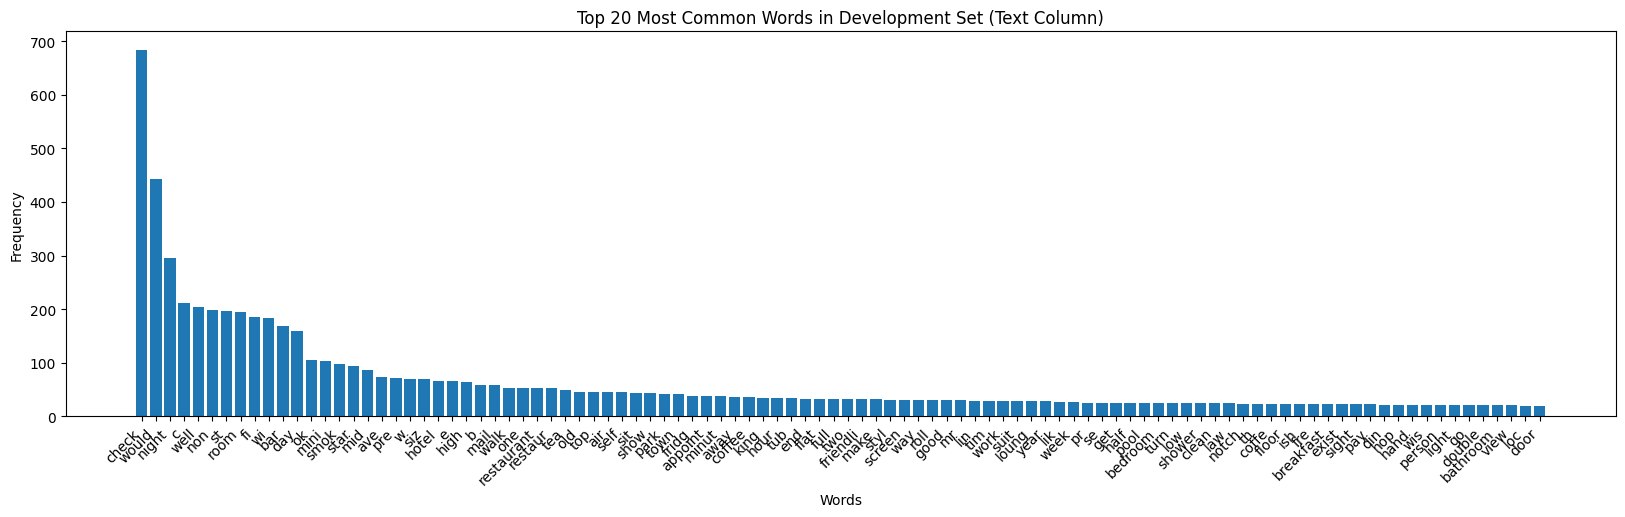

In [56]:
# Get the stopwords in English
stop_words = set(stopwords.words('english'))

# Combine all the text from the 'text' column in the dev_df
dev_text = " ".join(dev_df['text'])

# Tokenize the text
tokens = word_tokenize(dev_text)

# Remove stopwords and non-alphabetic words (alphanumeric and punctuation)
filtered_words = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Count the frequency of words
word_freq = Counter(filtered_words)

# Get the most common words
common_words = word_freq.most_common(100)

# Unzip the common words into two lists (words and frequencies)
words, frequencies = zip(*common_words)

# Plot the word frequencies
plt.figure(figsize=(20, 5))
plt.bar(words, frequencies)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words in Development Set (Text Column)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

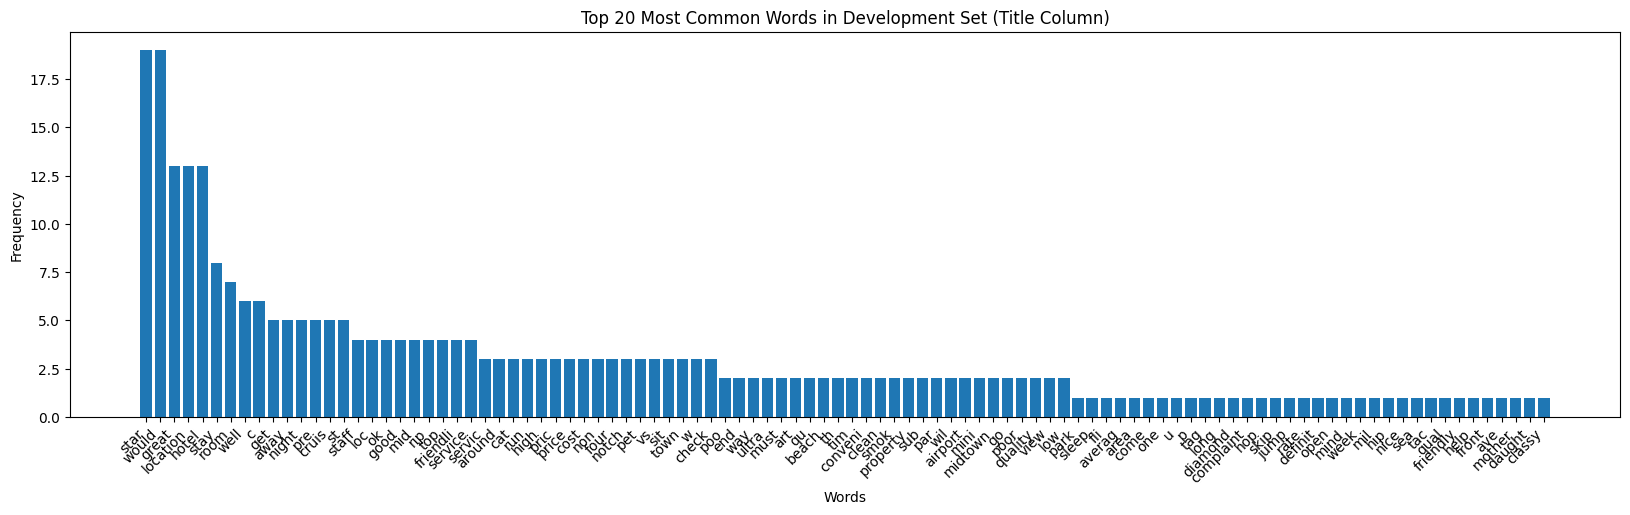

In [57]:
# Get the stopwords in English
stop_words = set(stopwords.words('english'))

# Combine all the text from the 'title' column in the dev_df
dev_title = " ".join(dev_df['title'])

# Tokenize the text
tokens_title = word_tokenize(dev_title)

# Remove stopwords and non-alphabetic words (alphanumeric and punctuation)
filtered_words_title = [word for word in tokens_title if word.isalpha() and word.lower() not in stop_words]

# Count the frequency of words
word_freq_title = Counter(filtered_words_title)

# Get the most common words
common_words_title = word_freq_title.most_common(100)

# Unzip the common words into two lists (words and frequencies)
words_title, frequencies_title = zip(*common_words_title)

# Plot the word frequencies
plt.figure(figsize=(20, 5))
plt.bar(words_title, frequencies_title)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Most Common Words in Development Set (Title Column)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

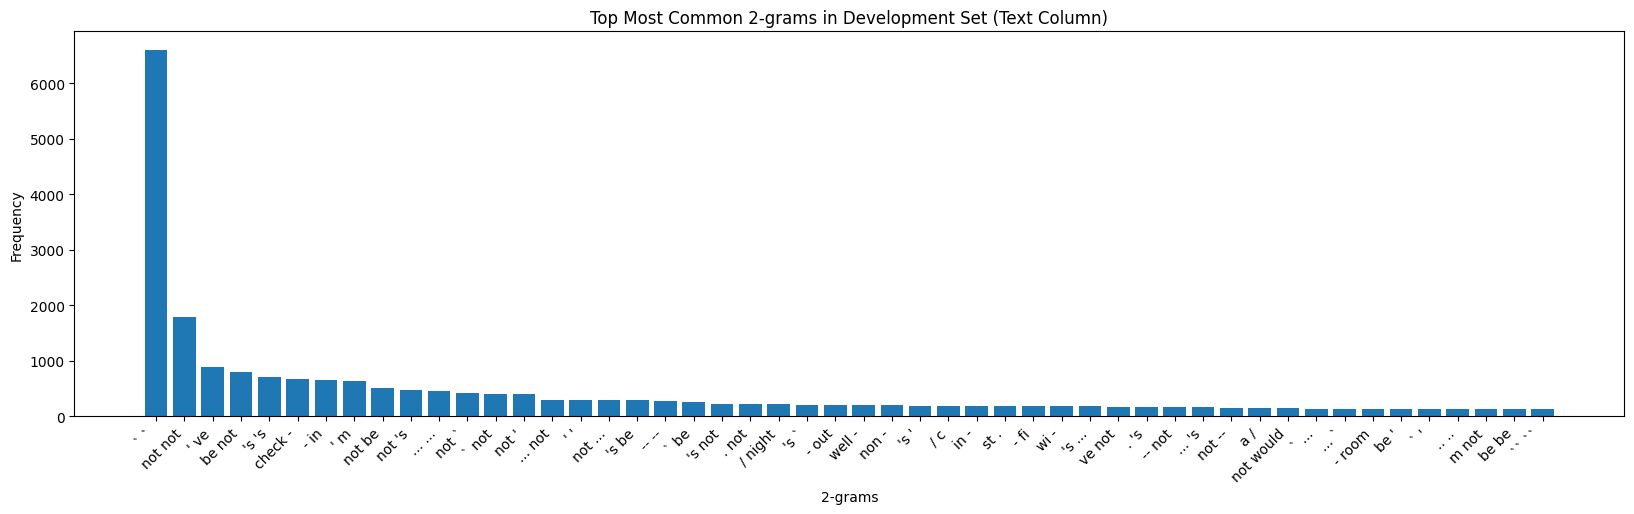

In [65]:
# Function to generate n-grams from a list of tokens
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Define the n value for the N-grams (e.g., bigrams or trigrams)
n_value = 2  # Change this to 3 for trigrams or other values for different n-grams

# Combine all the text from the 'text' column in the dev_df
dev_text = " ".join(dev_df['text'])

# Tokenize the text
tokens = nltk.word_tokenize(dev_text)

# Generate N-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the frequency of each N-gram
ngrams_count = Counter(ngrams_list)

# Get the top most common N-grams
common_ngrams = ngrams_count.most_common(50)

# Unzip the common n-grams into two lists (n-grams and their frequencies)
ngrams_labels, ngram_frequencies = zip(*common_ngrams)

# Plot the distribution of the N-grams
plt.figure(figsize=(20, 5))
plt.bar(ngrams_labels, ngram_frequencies)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top Most Common {n_value}-grams in Development Set (Text Column)')
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.show()

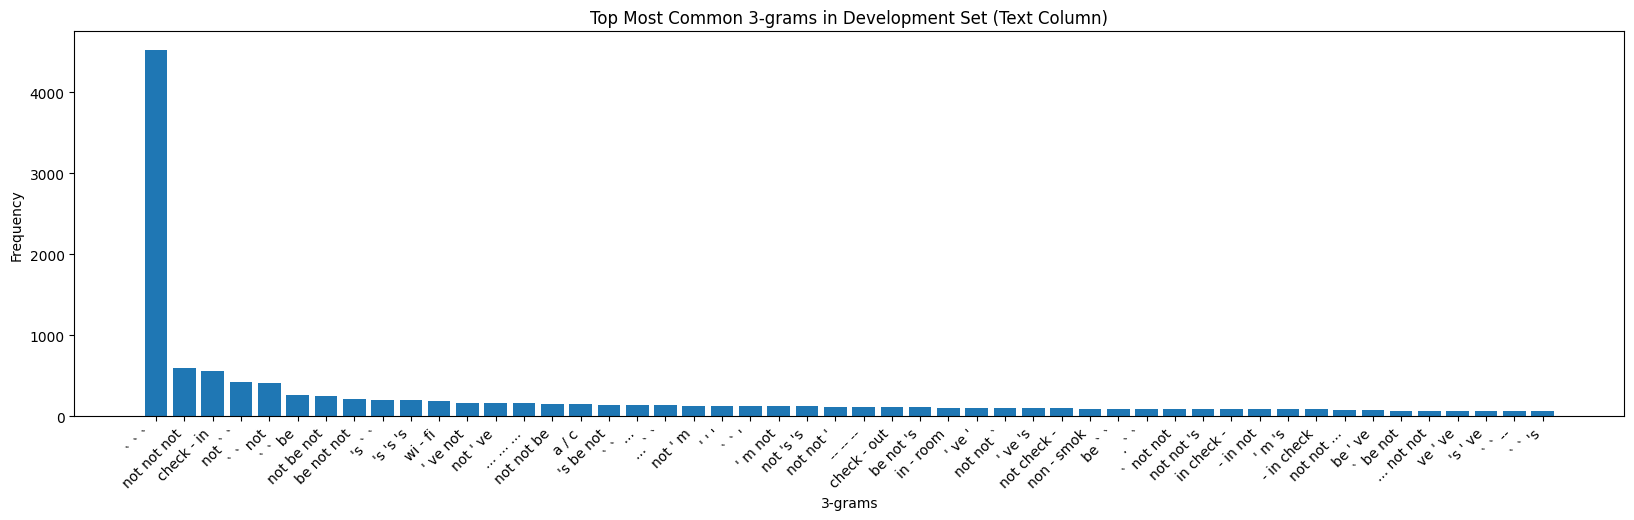

In [66]:
# Function to generate n-grams from a list of tokens
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Define the n value for the N-grams (e.g., bigrams or trigrams)
n_value = 3  # Change this to 3 for trigrams or other values for different n-grams

# Combine all the text from the 'text' column in the dev_df
dev_text = " ".join(dev_df['text'])

# Tokenize the text
tokens = nltk.word_tokenize(dev_text)

# Generate N-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the frequency of each N-gram
ngrams_count = Counter(ngrams_list)

# Get the top most common N-grams
common_ngrams = ngrams_count.most_common(50)

# Unzip the common n-grams into two lists (n-grams and their frequencies)
ngrams_labels, ngram_frequencies = zip(*common_ngrams)

# Plot the distribution of the N-grams
plt.figure(figsize=(20, 5))
plt.bar(ngrams_labels, ngram_frequencies)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top Most Common {n_value}-grams in Development Set (Text Column)')
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.show()

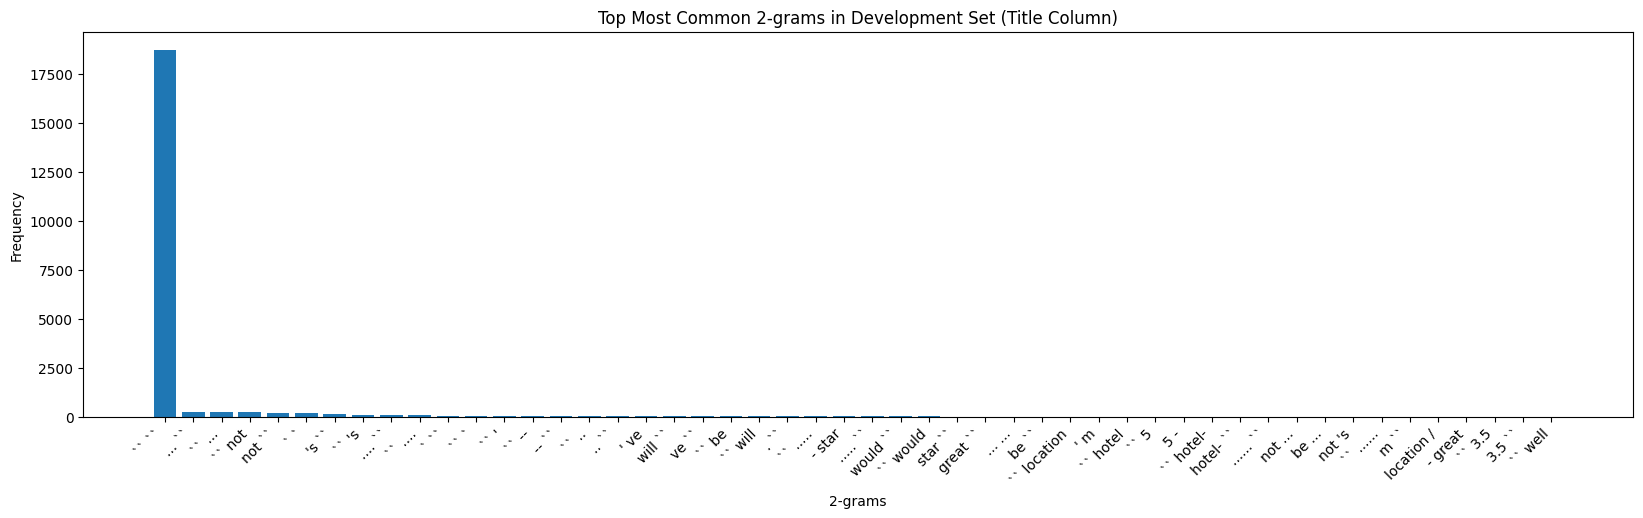

In [64]:
# Combine all the text from the 'title' column in the dev_df
dev_title = " ".join(dev_df['title'])

# Tokenize the title text
tokens_title = nltk.word_tokenize(dev_title)

# Generate N-grams for the title
ngrams_list_title = generate_ngrams(tokens_title, n_value)

# Count the frequency of each N-gram
ngrams_count_title = Counter(ngrams_list_title)

# Get the top most common N-grams in the title
common_ngrams_title = ngrams_count_title.most_common(50)

# Unzip the common n-grams into two lists (n-grams and their frequencies)
ngrams_labels_title, ngram_frequencies_title = zip(*common_ngrams_title)

# Plot the distribution of the N-grams for the title
plt.figure(figsize=(20, 5))
plt.bar(ngrams_labels_title, ngram_frequencies_title)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top Most Common {n_value}-grams in Development Set (Title Column)')
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.show()

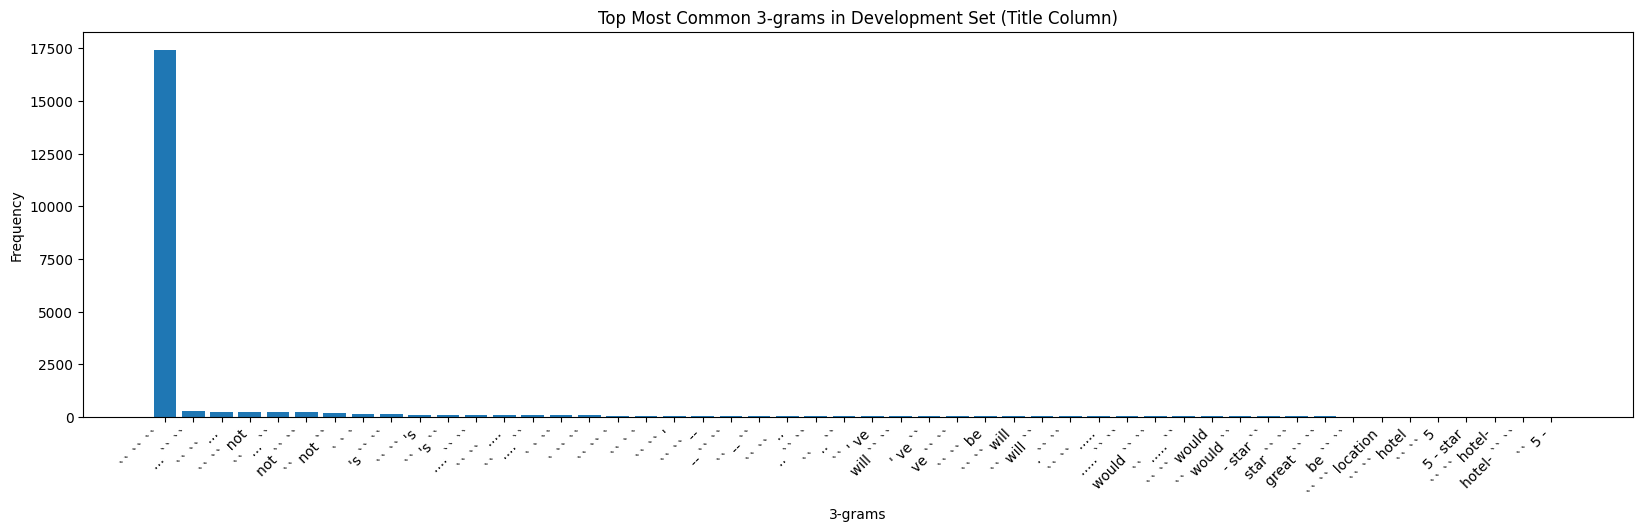

In [67]:
# Combine all the text from the 'title' column in the dev_df
dev_title = " ".join(dev_df['title'])

# Tokenize the title text
tokens_title = nltk.word_tokenize(dev_title)

# Generate N-grams for the title
ngrams_list_title = generate_ngrams(tokens_title, n_value)

# Count the frequency of each N-gram
ngrams_count_title = Counter(ngrams_list_title)

# Get the top most common N-grams in the title
common_ngrams_title = ngrams_count_title.most_common(50)

# Unzip the common n-grams into two lists (n-grams and their frequencies)
ngrams_labels_title, ngram_frequencies_title = zip(*common_ngrams_title)

# Plot the distribution of the N-grams for the title
plt.figure(figsize=(20, 5))
plt.bar(ngrams_labels_title, ngram_frequencies_title)
plt.xticks(rotation=45, ha='right')
plt.title(f'Top Most Common {n_value}-grams in Development Set (Title Column)')
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.show()